# <span style="color:darkblue"> Lecture 9 Exercises </span>

<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [2]:
# Write your answer here

import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```



In [3]:
# Write your own code
exchangerates=pd.read_csv('data_raw/exchangerates.csv')

exchangerates['date']=pd.to_datetime(exchangerates['date_string'])

exchangerates

,date_string,usd_to_rmb,usd_to_jpy,date
0,"1981, Friday, Jan 02",1.5341,202.50,1981-01-02
1,"1981, Monday, Jan 05",1.5418,199.05,1981-01-05
2,"1981, Tuesday, Jan 06",1.5264,199.70,1981-01-06
3,"1981, Wednesday, Jan 07",1.5264,201.05,1981-01-07
4,"1981, Thursday, Jan 08",1.5264,201.70,1981-01-08
...,...,...,...,...
11016,"2023, Monday, Mar 27",6.8834,131.49,2023-03-27
11017,"2023, Tuesday, Mar 28",6.8725,130.97,2023-03-28
11018,"2023, Wednesday, Mar 29",6.8862,132.69,2023-03-29
11019,"2023, Thursday, Mar 30",6.8700,132.71,2023-03-30


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"



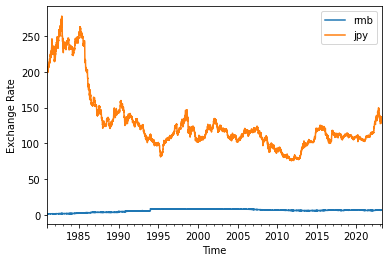

In [4]:
# Write your own code

exchangerates[["date","usd_to_rmb","usd_to_jpy"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.legend(["rmb","jpy"])

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_rmb" which computes the percentage daily <br>
growth rate of "usd_to_rmb".



In [17]:
# Write your own code


exchangerates["diff_rmb"] = exchangerates["usd_to_rmb"].diff()

exchangerates["lag_rmb"]    = exchangerates["usd_to_rmb"].shift(1)

exchangerates["growth_rmb"] = (exchangerates["diff_rmb"]/exchangerates["lag_rmb"])* 100

exchangerates["growth_rmb"]

0             NaN
1        0.501923
2       -0.998833
3        0.000000
4        0.000000
           ...   
11016    0.231525
11017   -0.158352
11018    0.199345
11019   -0.235253
11020   -0.034934
Name: growth_rmb, Length: 11021, dtype: float64

<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_rmb" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_rmb" series, label the axes and the title
- Use the command ```plt.fill_between()``` to create a shaded region <br>
for time periods where "bool_cond" is true.



In [18]:
exchangerates['bool_cond']

0        False
1        False
2        False
3        False
4        False
         ...  
11016    False
11017    False
11018    False
11019    False
11020    False
Name: bool_cond, Length: 11021, dtype: bool

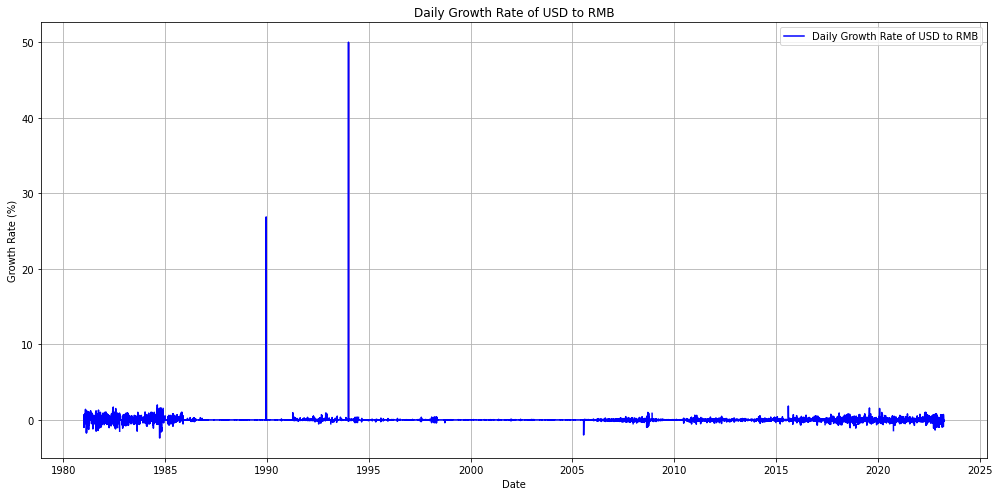

In [20]:
# Write your own code

exchangerates['bool_cond'] = exchangerates['growth_rmb'].apply(lambda x: x > 2 or x < -2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(exchangerates['date'], exchangerates['growth_rmb'], label='Daily Growth Rate of USD to RMB', linestyle='-', marker='', color='blue')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.title('Daily Growth Rate of USD to RMB')
plt.fill_between(exchangerates['date'], exchangerates['growth_rmb'], where=exchangerates['bool_cond'], color='red', alpha=0.3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [12]:
# Write your own code

month_config = pd.Grouper(key='date', freq='m')

monthly_std_dev = exchangerates.groupby(month_config)['usd_to_rmb'].std().reset_index(name='std_dev_usd_to_rmb')
monthly_std_dev

,date,std_dev_usd_to_rmb
0,1981-01-31,0.019149
1,1981-02-28,0.015432
2,1981-03-31,0.012636
3,1981-04-30,0.017154
4,1981-05-31,0.017583
...,...,...
502,2022-11-30,0.077405
503,2022-12-31,0.028203
504,2023-01-31,0.052152
505,2023-02-28,0.067344


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset


In [14]:
# Write your own code

long_format = pd.melt(exchangerates, var_name='type', value_name='exchange_rate', id_vars=['date'], value_vars=['usd_to_rmb', 'usd_to_jpy'])



long_format 

,date,type,exchange_rate
0,1981-01-02,usd_to_rmb,1.5341
1,1981-01-05,usd_to_rmb,1.5418
2,1981-01-06,usd_to_rmb,1.5264
3,1981-01-07,usd_to_rmb,1.5264
4,1981-01-08,usd_to_rmb,1.5264
...,...,...,...
22037,2023-03-27,usd_to_jpy,131.4900
22038,2023-03-28,usd_to_jpy,130.9700
22039,2023-03-29,usd_to_jpy,132.6900
22040,2023-03-30,usd_to_jpy,132.7100
